In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, plot_confusion_matrix

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv('./data/winequality-red.csv', delimiter=';')

In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
binary_data = data.copy()
binary_data['quality'] = binary_data['quality'].apply(lambda x: 1 if x > 5 else 0)

binary_data.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

In [6]:
X = binary_data.iloc[:, :-1]
y = binary_data.iloc[:, -1]

In [7]:
k_fold = KFold(n_splits=5, shuffle=True)

<h1>Scaler & Logistic Regression</h1>

In [8]:
result = []
recall_scores = {}
precision_scores = {}
accuracy_scores = {}
f1_scores = {}
confusion_matrixs = {}
coeff_ = {}

In [9]:
for i, (train_index, test_index) in enumerate(k_fold.split(data)):
    train_x, train_y = X.iloc[train_index], y.iloc[train_index]
    test_x, test_y = X.iloc[test_index], y.iloc[test_index]
    
    scaler = StandardScaler()
    # scaler = MinMaxScaler()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    model = LogisticRegression(max_iter=100, tol=0.0001, penalty='l2', C=1.0)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    
    result.append(pred_y)
    recall_scores[f'fold {i}'] = recall_score(pred_y, test_y)
    precision_scores[f'fold {i}'] = precision_score(pred_y, test_y)
    accuracy_scores[f'fold {i}'] = accuracy_score(pred_y, test_y)
    f1_scores[f'fold {i}'] = f1_score(pred_y, test_y)
    confusion_matrixs[f'fold {i}'] = confusion_matrix(pred_y, test_y)
    coeff_[f'fold {i}'] = model.coef_

In [10]:
recall_scores

{'fold 0': 0.7444444444444445,
 'fold 1': 0.7710843373493976,
 'fold 2': 0.7616279069767442,
 'fold 3': 0.7636363636363637,
 'fold 4': 0.785234899328859}

In [11]:
precision_scores

{'fold 0': 0.7790697674418605,
 'fold 1': 0.6956521739130435,
 'fold 2': 0.7660818713450293,
 'fold 3': 0.7455621301775148,
 'fold 4': 0.7358490566037735}

In [12]:
accuracy_scores

{'fold 0': 0.7375,
 'fold 1': 0.70625,
 'fold 2': 0.746875,
 'fold 3': 0.74375,
 'fold 4': 0.768025078369906}

In [13]:
f1_scores

{'fold 0': 0.7613636363636365,
 'fold 1': 0.7314285714285714,
 'fold 2': 0.7638483965014577,
 'fold 3': 0.7544910179640719,
 'fold 4': 0.7597402597402597}

In [14]:
coeff_

{'fold 0': array([[ 0.10584314, -0.65369623, -0.28075614,  0.00520524, -0.14995176,
          0.24563989, -0.62343107,  0.04404983, -0.12869697,  0.41375488,
          0.94076846]]),
 'fold 1': array([[ 0.2936071 , -0.54023089, -0.24923417,  0.12069744, -0.20754183,
          0.23115106, -0.49249597, -0.1173971 , -0.05867259,  0.53003796,
          0.97643928]]),
 'fold 2': array([[ 0.11221542, -0.59959879, -0.17267931,  0.06547022, -0.20491456,
          0.22770685, -0.53045904, -0.05378344, -0.1056183 ,  0.4244863 ,
          0.97257088]]),
 'fold 3': array([[ 0.27685757, -0.59965264, -0.22907931,  0.00373236, -0.18099944,
          0.19996276, -0.49676694, -0.08435   , -0.01748427,  0.43959263,
          0.94283009]]),
 'fold 4': array([[ 0.37964816, -0.52105082, -0.27332106,  0.18350328, -0.18145744,
          0.24296099, -0.54159881, -0.28028043,  0.01541049,  0.55137776,
          0.74966124]])}

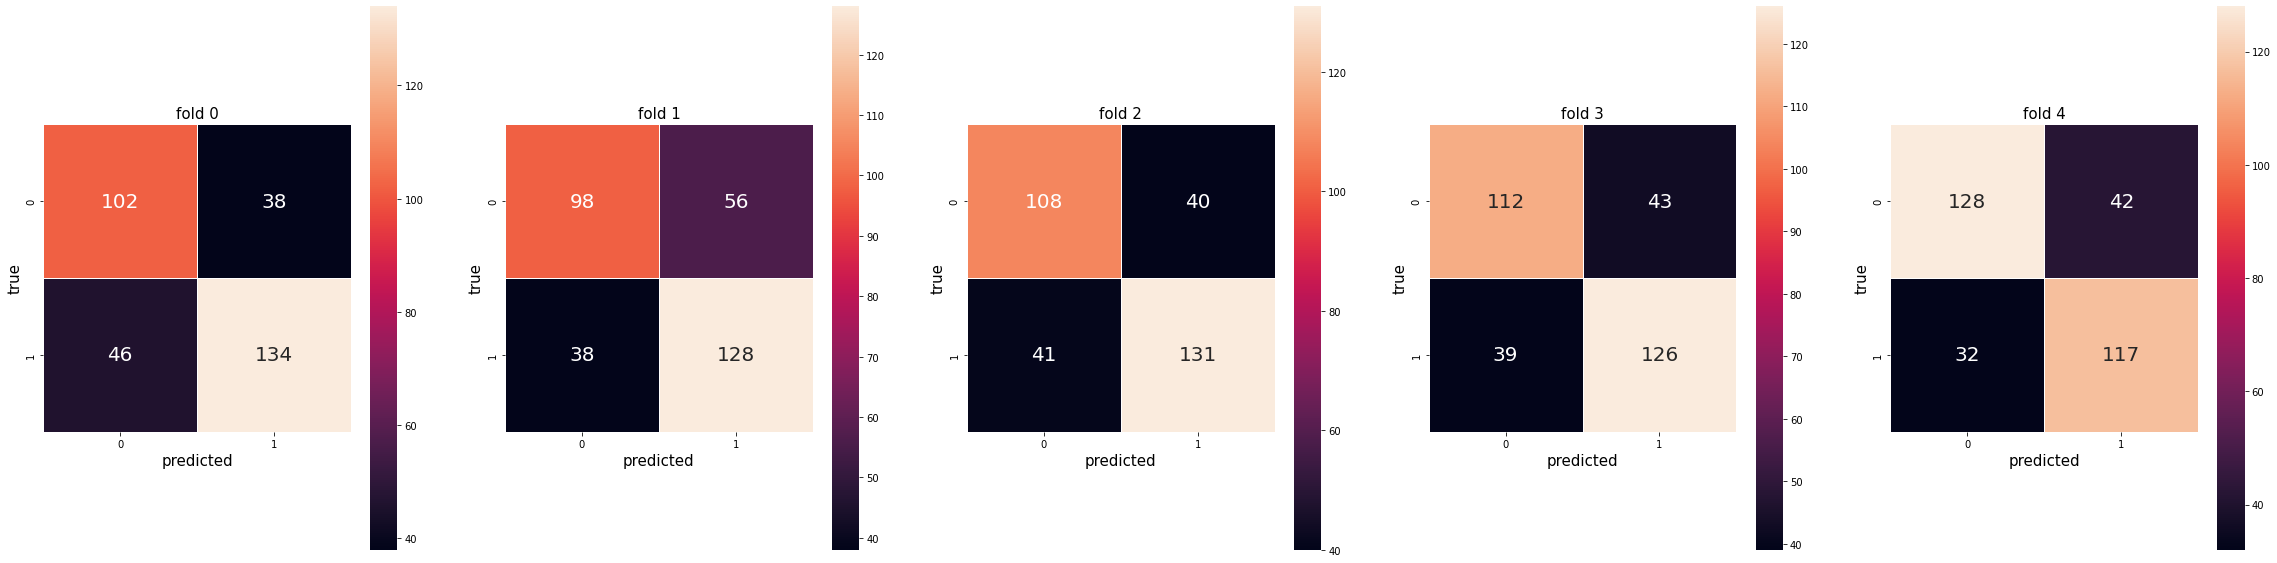

In [15]:
fig, ax = plt.subplots(1,5, figsize=(40,10))
for i, matrix in enumerate(confusion_matrixs.values()):
    sb.heatmap(matrix, annot=True, annot_kws={"size": 20}, fmt=".0f", linewidths=.5, square = True, ax=ax[i])
    ax[i].set_xlabel('predicted', size=15)
    ax[i].set_ylabel('true', size=15)
    ax[i].set_title(f'fold {i}', size=15)

<h1>k-NN</h1>

In [16]:
result = []
recall_scores = {}
precision_scores = {}
accuracy_scores = {}
scores = {}
f1_scores = {}
confusion_matrixs = {}

In [17]:
for i, (train_index, test_index) in enumerate(k_fold.split(data)):
    train_x, train_y = X.iloc[train_index], y.iloc[train_index]
    test_x, test_y = X.iloc[test_index], y.iloc[test_index]
    
    scaler = StandardScaler()
    # scaler = MinMaxScaler()
    train_x = scaler.fit_transform(train_x)
    test_x = scaler.transform(test_x)
    
    model = KNeighborsClassifier(n_neighbors=5, )
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    
    result.append(pred_y)
    recall_scores[f'fold {i}'] = recall_score(pred_y, test_y)
    precision_scores[f'fold {i}'] = precision_score(pred_y, test_y)
    accuracy_scores[f'fold {i}'] = accuracy_score(pred_y, test_y)
    f1_scores[f'fold {i}'] = f1_score(pred_y, test_y)
    confusion_matrixs[f'fold {i}'] = confusion_matrix(pred_y, test_y)
    
    scores[f'fold {i}'] = model.score(test_x, test_y)

In [18]:
recall_scores

{'fold 0': 0.7135135135135136,
 'fold 1': 0.76,
 'fold 2': 0.7015706806282722,
 'fold 3': 0.7209302325581395,
 'fold 4': 0.7164948453608248}

In [19]:
precision_scores

{'fold 0': 0.7951807228915663,
 'fold 1': 0.7189189189189189,
 'fold 2': 0.8072289156626506,
 'fold 3': 0.7607361963190185,
 'fold 4': 0.7942857142857143}

In [20]:
accuracy_scores

{'fold 0': 0.728125,
 'fold 1': 0.70625,
 'fold 2': 0.721875,
 'fold 3': 0.728125,
 'fold 4': 0.7147335423197492}

In [21]:
f1_scores

{'fold 0': 0.7521367521367522,
 'fold 1': 0.7388888888888888,
 'fold 2': 0.7507002801120448,
 'fold 3': 0.7402985074626867,
 'fold 4': 0.7533875338753389}

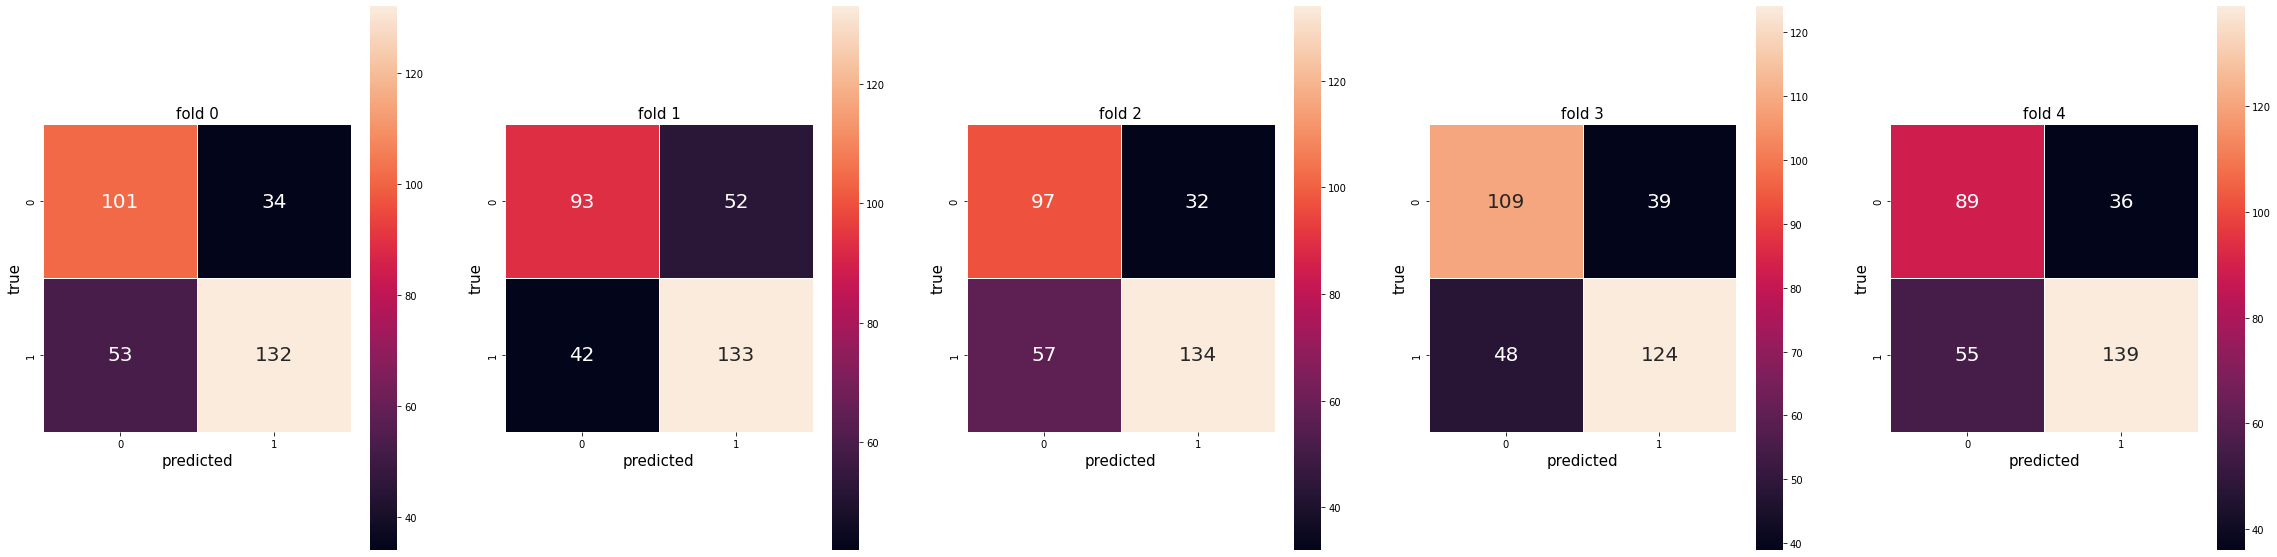

In [22]:
fig, ax = plt.subplots(1,5, figsize=(40,10))
for i, matrix in enumerate(confusion_matrixs.values()):
    sb.heatmap(matrix, annot=True, annot_kws={"size": 20}, fmt=".0f", linewidths=.5, square = True, ax=ax[i])
    ax[i].set_xlabel('predicted', size=15)
    ax[i].set_ylabel('true', size=15)
    ax[i].set_title(f'fold {i}', size=15)

<h1>Multi classification with MNIST dataset</h1>

In [23]:
from sklearn import datasets
dataset = datasets.load_digits()

X, y = dataset.data, dataset.target

In [24]:
train_x, test_x, train_y, test_y = train_test_split(X, y, shuffle=True, test_size=0.33)

In [25]:
train_x.shape

(1203, 64)

In [26]:
train_y.shape

(1203,)

0

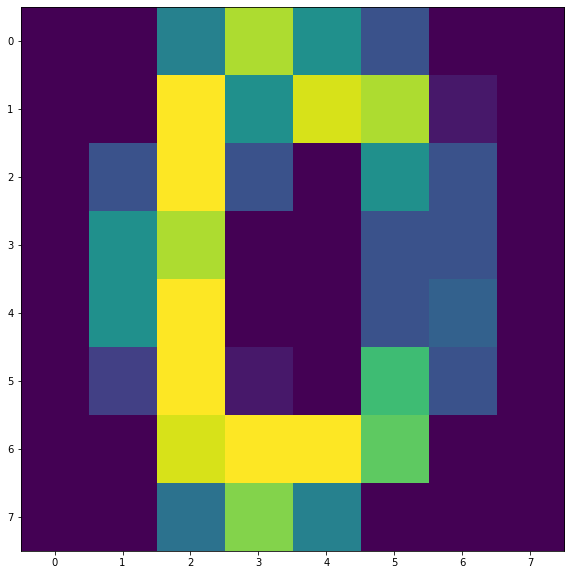

In [27]:
i = 8
plt.figure(figsize=(10,10))
plt.imshow(train_x[i].reshape(8,8))
train_y[i]

<AxesSubplot:>

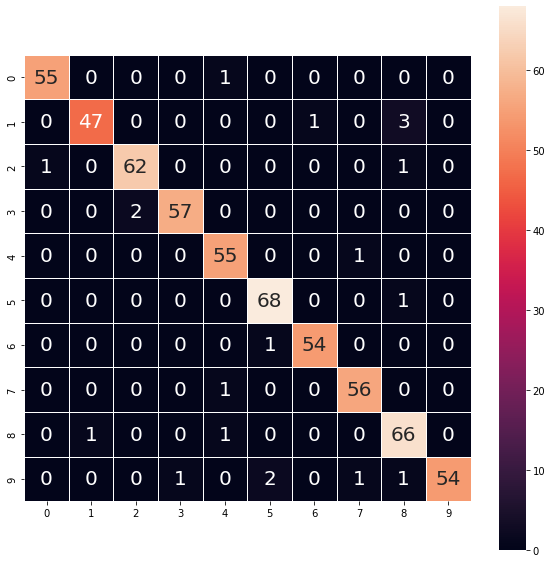

In [28]:
logistic_regression = LogisticRegression()
logistic_regression.fit(train_x, train_y)
pred_y = logistic_regression.predict(test_x)
confusion_ = confusion_matrix(pred_y, test_y)

plt.figure(figsize=(10,10))
sb.heatmap(confusion_, annot=True, annot_kws={"size": 20}, fmt=".0f", linewidths=.5, square = True)

In [29]:
f1_score(pred_y, test_y, average='micro')

0.9663299663299664

<AxesSubplot:>

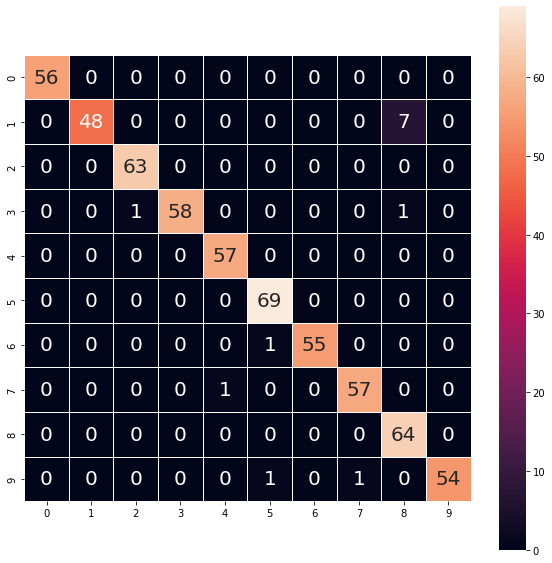

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x, train_y)
pred_y = knn.predict(test_x)
confusion_ = confusion_matrix(pred_y, test_y)

plt.figure(figsize=(10,10))
sb.heatmap(confusion_, annot=True, annot_kws={"size": 20}, fmt=".0f", linewidths=.5, square = True)

In [31]:
f1_score(pred_y, test_y, average='micro')

0.9781144781144782

<AxesSubplot:>

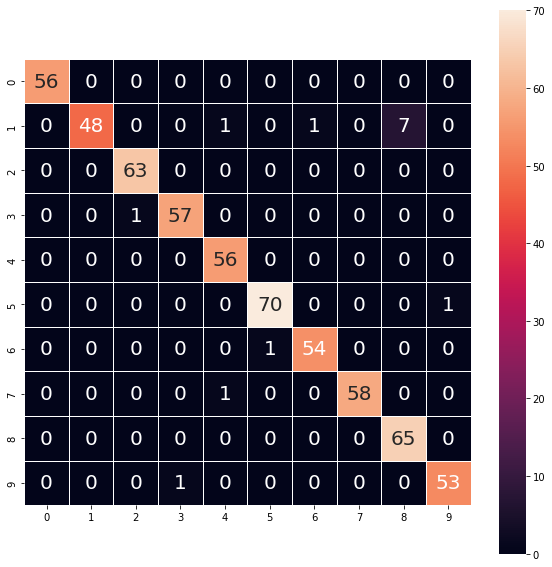

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_x, train_y)
pred_y = knn.predict(test_x)
confusion_ = confusion_matrix(pred_y, test_y)

plt.figure(figsize=(10,10))
sb.heatmap(confusion_, annot=True, annot_kws={"size": 20}, fmt=".0f", linewidths=.5, square = True)

<AxesSubplot:>

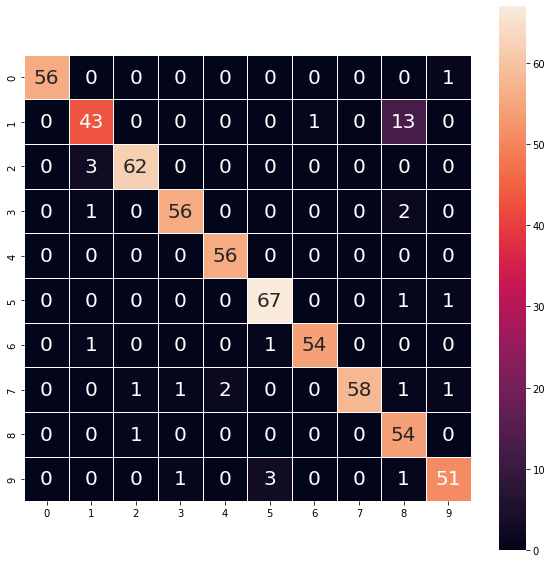

In [33]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(train_x, train_y)
pred_y = knn.predict(test_x)
confusion_ = confusion_matrix(pred_y, test_y)

plt.figure(figsize=(10,10))
sb.heatmap(confusion_, annot=True, annot_kws={"size": 20}, fmt=".0f", linewidths=.5, square = True)

<h1>Assignment</h1>

주어진 Wine dataset을 logistic regression과 k-NN을 사용하여 분류 및 예측

Target y - column 'Wine'<br>
Input X - 나머지 column

1. train과 test를 나눠서 사용할 것
2. scaler를 사용해볼 것
3. f1 score와 confusion_matrix를 보여줄 것

In [34]:
data = pd.read_csv('./data/Wine.csv')
data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,Red,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,Red,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,Red,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,Red,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,Red,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Sparkling,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,Sparkling,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,Sparkling,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,Sparkling,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
